In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Whether dataset has missing values

In [60]:
with open('census-bureau.columns') as f:
    columns = [line.strip() for line in f if line.strip()]

df = pd.read_csv('census-bureau.data', names=columns)
has_na = df.isna().any().any()
print('has_na: ', has_na)

has_na:  True


### Which rows has na

In [61]:
na_rows = df[df.isna().any(axis=1)]
na_rows

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
719,68,Not in universe,0,0,9th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1042,67,Not in universe,0,0,10th grade,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
1547,6,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Haiti,Haiti,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
1618,21,Not in universe,0,0,Some college but no degree,0,High school,Never married,Not in universe or children,Not in universe,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,4,94,- 50000.
2278,46,Not in universe,0,0,11th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Mexico,Mexico,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198100,20,Not in universe,0,0,Some college but no degree,0,College or university,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
198169,24,Private,40,10,Bachelors degree(BA AB BS),0,Not in universe,Never married,Entertainment,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
198231,49,Local government,43,29,11th grade,0,Not in universe,Divorced,Education,Other service,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
198819,55,Private,19,36,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,94,- 50000.


### Which column has na

In [62]:
has_na_cols = df.columns[df.isna().any()]
print('has_na_cols: ', has_na_cols)

has_na_cols:  Index(['hispanic origin'], dtype='object')


### # of columns

In [63]:
df.columns.size

42

### All columns

In [64]:
df.columns

Index(['age', 'class of worker', 'detailed industry recode',
       'detailed occupation recode', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'marital stat', 'major industry code',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'tax filer stat',
       'region of previous residence', 'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household', 'weight',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
       'ow

### Number of features

In [65]:
df.columns.drop(['weight','label']).size

40

### Numeric and category features

In [66]:
num_cols = df.drop(columns=['weight','label']).select_dtypes(include=['number']).columns
cat_cols = df.drop(columns=['weight','label']).select_dtypes(exclude=['number']).columns
num_cols, cat_cols
num_cols.size, cat_cols.size
print('# of numeric features: ', num_cols.size)
print('# of category features: ', cat_cols.size)
print('numerical columns: ', num_cols)
print('category columns: ', cat_cols)

# of numeric features:  12
# of category features:  28
numerical columns:  Index(['age', 'detailed industry recode', 'detailed occupation recode',
       'wage per hour', 'capital gains', 'capital losses',
       'dividends from stocks', 'num persons worked for employer',
       'own business or self employed', 'veterans benefits',
       'weeks worked in year', 'year'],
      dtype='object')
category columns:  Index(['class of worker', 'education', 'enroll in edu inst last wk',
       'marital stat', 'major industry code', 'major occupation code', 'race',
       'hispanic origin', 'sex', 'member of a labor union',
       'reason for unemployment', 'full or part time employment stat',
       'tax filer stat', 'region of previous residence',
       'state of previous residence', 'detailed household and family stat',
       'detailed household summary in household',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in th

### Different class weighted samples

In [67]:
print('class 0: ', df.label.unique()[0])
weighted_neg = df.weight[df.label == df.label.unique()[0]].sum()
print('class 1: ', df.label.unique()[1])
weighted_pos = df.weight[df.label == df.label.unique()[1]].sum()
print("Weighted negatives:", weighted_neg)
print("Weighted positives:", weighted_pos)


class 0:  - 50000.
class 1:  50000+.
Weighted negatives: 325004647.22
Weighted positives: 22241245.25


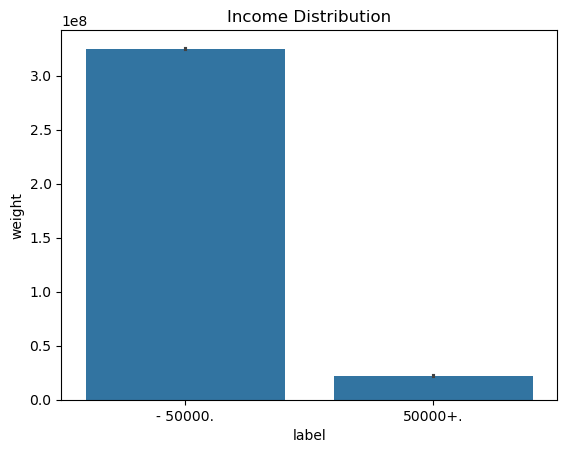

In [68]:
sns.barplot(
    data=df,
    x="label",
    y="weight",      # use weight column as "value"
    estimator=sum,   # sum weights per label
)
plt.title("Income Distribution")
plt.show()


